Back to the main [Index](../index.ipynb)

### Simple Example

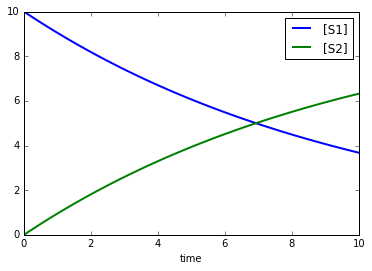

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [1]:
%matplotlib inline
from __future__ import print_function
import tellurium as te
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
r.simulate(0, 10, 100)
r.plot()

### More Complex Example
Stochastic simulation of a linear chain.

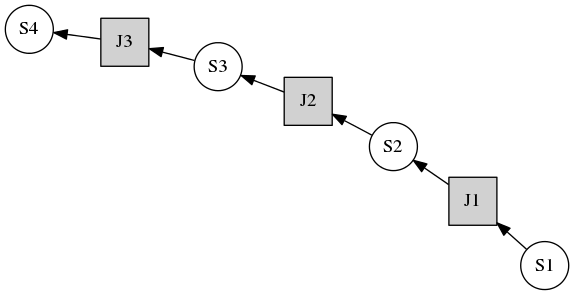

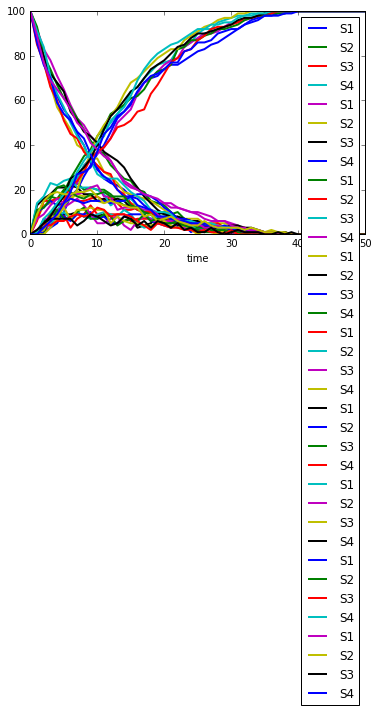

In [18]:
import tellurium as te
r = te.loada('''
    J1: S1 -> S2;  k1*S1; 
    J2: S2 -> S3; k2*S2 - k3*S3
    # J2_1: S2 -> S3; k2*S2
    # J2_2: S3 -> S2; k3*S3;
    J3: S3 -> S4; k4*S3;

    k1 = 0.1; k2 = 0.5; k3 = 0.5; k4 = 0.5;
    S1 = 100;
''')
r.draw(width=300)
# run the simulation
r.setIntegrator('gillespie')
r.selections = ['time'] + r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()


for k in range(1,10):
    r.resetToOrigin()
    s = r.simulate(0, 50)
    r.plot(s, show=False);